In [2]:
import numpy as np
from scipy.stats import *
import pandas as pd
import math

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3


'%.3f'

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

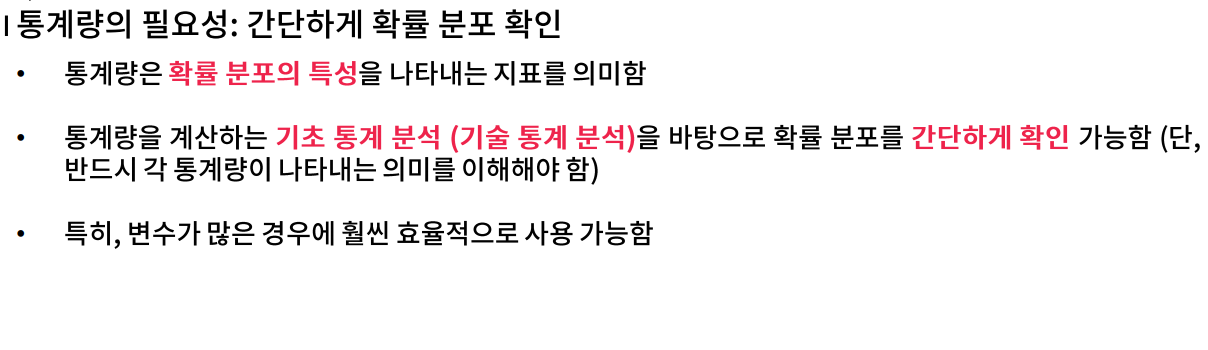

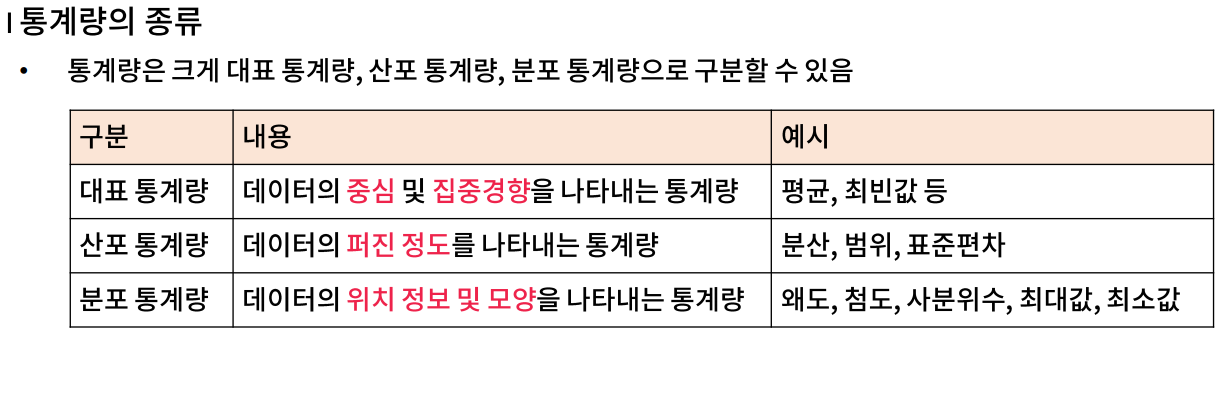

# 기술 통계량

### 데이터의 특징을 요약, 기술하는 통계량
- 위치 통계량(measure of location)
    - 데이터의 중심 위치를 나타내는 척도(대표값)
    - 평균, 중위수, 절사평균, 최빈수, 사분위수 등

- 변이 통계량(measure of dispersion)
    - 데이터의 퍼짐,흩어진 정도를 나타내는 척도(산포도)
    - 표준편차, 분산, 사분위간범위 등

- 모양 통계량(measure of shape)
    - 왜도
        - 중심 위치로부터 어느 한쪽으로 치우친(비대칭) 정도를 나타내는 척도
    - 첨도
        - 분포의 뾰족한 정도
        
      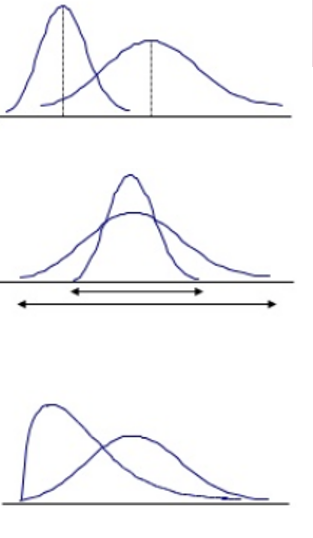  


### 위치 통계량(중심경향성)

####  평균(mean)
- 가장 많이 사용되는 대표값
    - 모든 데이터의 합을 데이터의 개수로 나눈 값(산술평균)
   ![](평균.png)

- 특징
    - 계산이 쉽고, 수학적으로 활용하기 편리하며 각 자료에 대해 유일한 값을 가짐
    - 분산의 계산, 모수 추정, 가설검정 등 통계분석의 대표적인 통계량으로 널리 사용됨
    - 데이터에 극단적인 값이 포함될 경우 평균이 왜곡되는 경향이 있음
    - 이러한 경우, 대표 값으로 중앙값을 사용 

- 모평균 : 값을 구하기 위한 모든 데이터들의 평균
- 표준평균 : 모든 값을 구할 수 없기 때문에 신뢰도가 훼손되지 않는 선에서 값들을 추출하여 구한 평균

#### 산술 평균 계산
- 가장 널리 사용되는 평균으로 연속형 변수에 대해 사용
- 다른 관측치에 비해 매우크거나 작은값에 크게 영향을받음

In [4]:
x = [1, 2, 3, 4, 5]
np.mean(x) # 넘파이
np.array(x).mean() # 파이썬
pd.Series(x).mean() # 판다스 시리즈

3.000

3.000

3.000

In [5]:
# 이진 변수(0과 1로 구성)에 대한 평균 - 이진 변수에 대한 산술평균은 1의 비율과 같음
x = [1, 0, 0, 0, 1]
np.mean(x) # 넘파이
np.array(x).mean() # 파이썬
pd.Series(x).mean() # 판다스 시리즈

0.400

0.400

0.400

In [7]:
pwd

'/Users/Kimseunghyun/KDT/Python Learning/day15'

In [18]:
df = pd.read_csv('../../DB_work/csv/ch2_scores_em.csv',
                 index_col='student number') 
                # index_col 원하는 컬럼을 인덱스로 불러오기
# df의 처음 5행을 표시
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [14]:
# 10개 영어점수만 추출 후 저장
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [15]:
scores_df = pd.DataFrame({'score':scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df # 파일 -> csv -> 슬라이싱(배열) -> df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [12]:
# 산술평균
sum(scores)/len(scores)
np.mean(scores)
scores_df.mean()


55.000

55.000

score    55.0
dtype: float64

#### 기하평균
- n개의 양수 값을 모두 곱한 것의 n 제곱근
- 성장률의 평균
![](기하평균.png)


- 아래 year데이터는 어느 회사의 매출 증가율을 수집해 놓은 데이터임
    - 1차년도에 200% , 2차년도에 800%, 3차년도에 300% 성장을 했다면 연평균 성장율은 어떻게 되는가?

In [22]:
year = [2,8,3]

In [23]:
# 위 데이터의 산술 평균
np.mean(year)

# 매년 430% 성장으로 나타남 - 1차년도에 430% 2차년도 430% 3차년도 430% 라면 전년대비 성장이므로 이 회사는 3개년동안
#  430*430*430 성장한게 되므로 총 79507000 성장한상황이 됨

# 실제 성장은 200*800*300 으로 48000000 성장한 것 이므로 차이가 많다

# 이렇게 곱하기를 해서 나오는 값에 대한 평균은 산술평균을 사용하면 의미가 달라지므로 기하평균을 사용해야 함

4.333

### 매출 증가율 예시
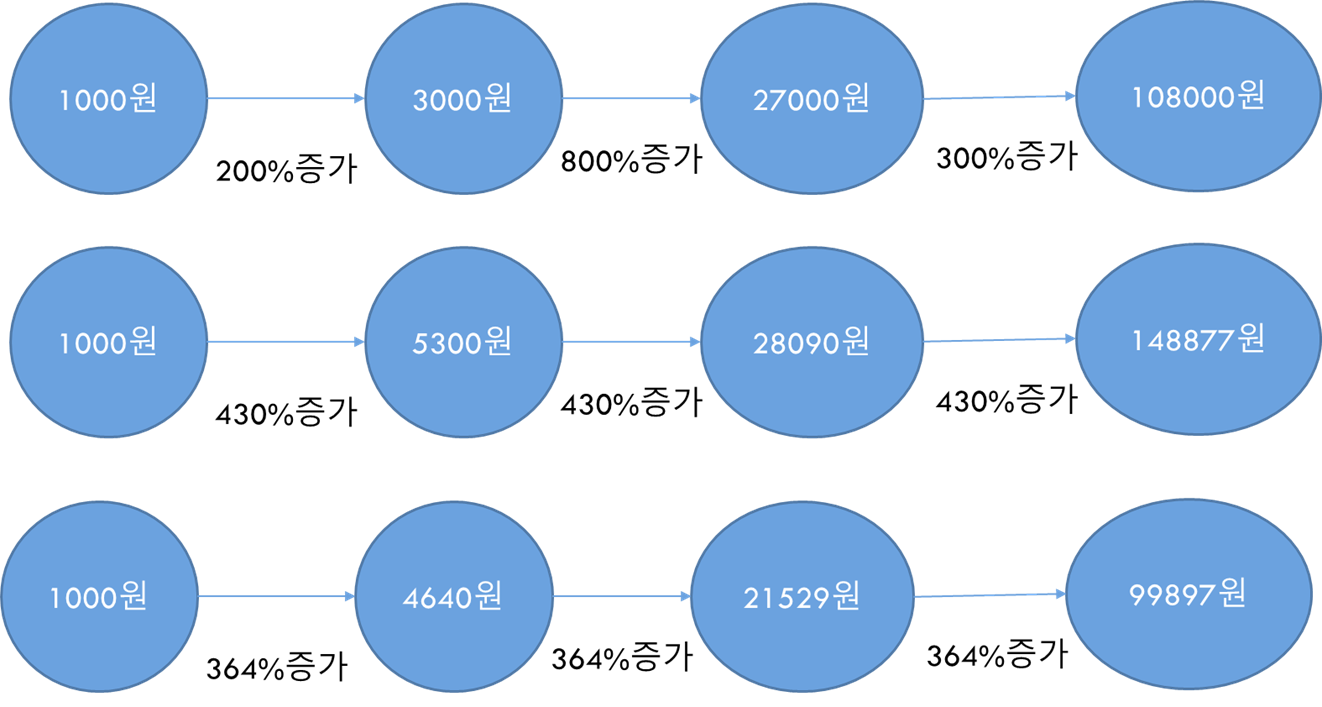

In [24]:
# 집합자료형을 인수로 받아 모든 원소를 곱한 결과를 반환하는 함수

def multiply(arr):
    ans = 1
    for n in arr:
        if n == 0:
                return 0
        ans *= n
    return ans

In [25]:
# 기하평균
multiply(year) ** (1/len(year))

# 연평균 약 363% 증가

3.634*3.634*3.634

3.634

47.990

#### 조화 평균
- mmean() 함수 사용
- 비율 및 변화율에 대한 평균을 계산할 때 사용
- 주어진 수들의 역수들의 산술평균에서 역수를 취한 값
![](조화평균.png)

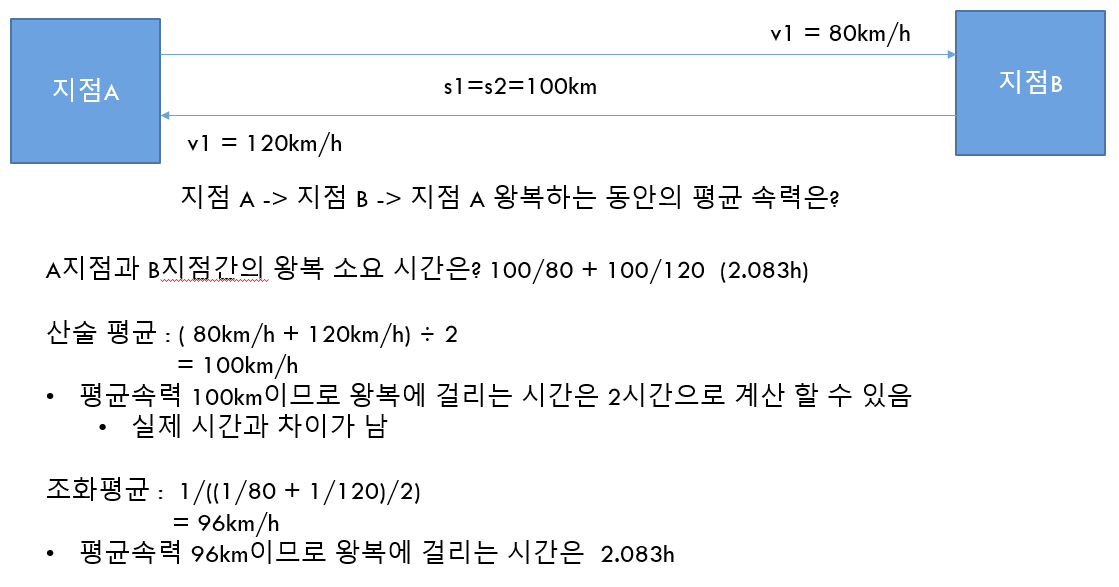

##### 100km 떨어진 도시까지 차로 다녀오면서 가는길에는 시속 80km 오는길은 시속 120km로 달렸을때 평균 속력은 얼마나 되는가?
- 움직인 거리 200km
- 움직인 시간 100/80 + 100/120

![](조화평균예제.png)

In [20]:
x=np.array([80,120])
print(len(x)/np.sum(1/x))
print(hmean(x))

95.99999999999999
95.99999999999999


In [22]:
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
print(len(x)/np.sum(1/x))
print(hmean(x))  # 조화평균
np.mean(x)       # 산술평균

0.21897810218978103
0.21897810218978103


0.300

### 중앙값(median)

- 중위수, 중간값
- 데이터를 크기 순서대로 나열할 때 가운데 위치하는 숫자
- 데이터의 개수가 홀수일 경우 : 가운데 위치하는 유일한 숫자
- 데이터의 개수가 짝수일 경우 : 가운데 위치하는 2개의 숫자의 평균값
    
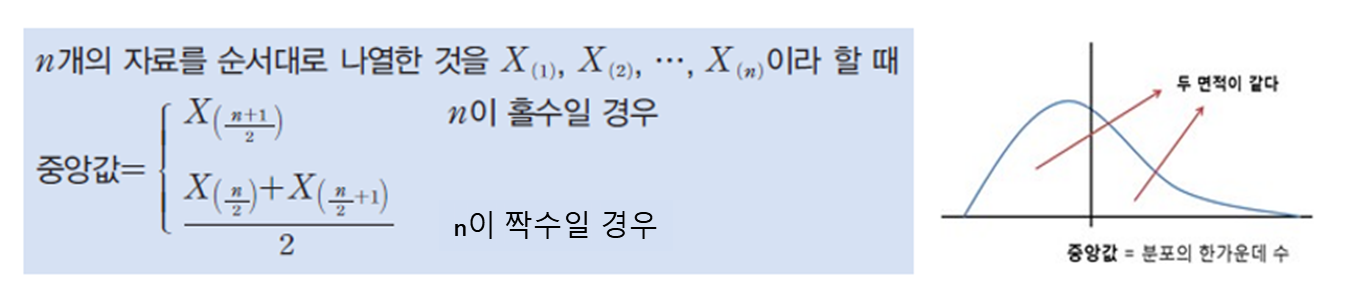
    
- 특징
    - 극단적인 값에 영향을 받지 않는 장점
    - 가운데 위치하는 한 개 또는 두 개의 데이터만으로 계산



- 극단적인 값이 포함된 데이터의 대표 값 비교

- 평균 : 모든 데이터를 전부 고려하여 계산한 값, 무게 중심
- 중앙값 : 데이터의 개수와 순서만을 고려하여 계산 
- 예. 세 개의 추(10kg, 20kg, 60kg)가 있는 경우
    - 평균은 세 무게의 균형을 나타내는 시소의 중심
    - 중앙값은 개수(3)의 중앙(2)을 나타냄 
    - 만약 60kg의 추를 80kg으로 대체할 경우 평균을 나타내는 시소의 중심은 오른쪽으로 이동하지만, 중앙값은 변화하지 않고 그대로 20kg이 됨
![](평균과중앙값의비교.png)

In [26]:
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [24]:
sorted_scores = np.sort(scores) # 차순 정렬
sorted_scores
len(sorted_scores) #개수 확인

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

10

In [29]:
n = len(sorted_scores)
if n % 2 == 0:
    # 중앙 위치 2개값의 평균이 중앙값
    m0 = sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1)/2
else:
    # 중앙 위치 1개 값
    median = sorted_scores[(n+1)//2-1]
median

56.500

In [29]:
np.median(scores)
scores_df.median()

56.500

score    56.5
dtype: float64

#### 절사 평균(trimmed mean)이 필요한 이유

- 평균의 장점과 중앙값의 장점을 갖는 대표값 
- 예.
    - 체조, 다이빙, 피겨스케이팅 등에서 심판의 주관적인 편견을 배제, 보완하기 위해 제일 높은 점수와 제일 낮은 점수를 제외(중앙값의 장점)한 나머지 심판들의 점수에 대한 평균(평균의 장점)으로 판정
    

- 절사평균을 계산하려면 절사비율(%)을 결정해야 함 

    - 절사비율은 전체 데이터의 개수에 대해 몇 %의 데이터(상위+하위)를 배제할 것인가로 결정
    - 만약 5개의 데이터에 대해 가장 낮은 점수와 가장 높은 점수 각각 1개씩을 배제한다면 절사율은 40%(2/5)가 됨
    - 5개의 데이터에 대해 40% 절사평균
    - 데이터를 순서대로 정렬한 경우 가운데 위치하는 3개의 평균으로 계산


In [30]:
np.random.seed(0)
# 소득 평균이 2백만원이고 표준편차가 50만원인 정규분포를 따르는 소득 생성
# 100명의 소득 생성
income = np.random.normal(2000000,500000,100)

In [31]:
 # 소득이 10억원인 사람의 등장
income = np.append(income, 10**9)
 # 100명의 소득이 200만원에 가까운데, 한 명 때문에 대표값인 평균이 1200만원에 달함
np.mean(income)

11910796.047

#### 절사 평균 계산: trim_mean((x,proportiontocnt)

proportiontocnt : 절사율


- 매우 크거나 작은 값에 의한 영향을 줄이기 위해 고안 됨
- 데이터에서 범위에 속하는 데이터에 대해서만 평균을 낸 것

In [32]:
trim_mean(income, 0.2)  # 절사율 20%  20~80% 범위 내의 값

2031747.353

### 최빈값(mode)

- 자료 중 가장 자주 나타나는(빈도가 가장 많은) 관측치
   - 평균, 중위수와 달리 자료에 따라 존재하지 않을수도 있고, 유일한 값이 아닐 수도 있음
   - 질적 변수에도 활용
   

- 중앙값과 최빈값의 특징

   -  자료 속에 극단적인 이상치가 있는 경우 극단적 관찰치에 덜 민감한 중앙값을 사용
   -  자료의 분포가 비대칭인 경우 평균의 보조 자료로 활용
   -  개방 구간을 갖는 도수분포표의 경우 중앙값 또는 최빈값을 대표값으로 사용
   -  명목자료와 서열자료의 경우 최빈값 사용

#### 최빈값 계산
- 한 변수가 가장 많이 취한 값을의미,범주형 변수에 대해서만적용

In [48]:
np.random.seed()
x = np.random.choice(['A', 'B', 'C','D'], 1000) # A, B, C라는 요소로 구성
x[:10]
len(x)

array(['D', 'A', 'B', 'D', 'C', 'B', 'D', 'D', 'B', 'A'], dtype='<U1')

1000

In [66]:
mode(x)
mode(x).mode  # 가장 빈도가 높은 원소
mode(x).count # 가장 빈도가 높은 원소의 빈도수

/var/folders/8w/n7c94rx9259cqqy815cxfms00000gn/T/ipykernel_75753/253953335.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode(x)
/var/folders/8w/n7c94rx9259cqqy815cxfms00000gn/T/ipykernel_75753/253953335.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode(x)


ModeResult(mode=array(['B'], dtype='<U1'), count=array([264]))

/var/folders/8w/n7c94rx9259cqqy815cxfms00000gn/T/ipykernel_75753/253953335.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode(x).mode  # 가장 빈도가 높은 원소
/var/folders/8w/n7c94rx9259cqqy815cxfms00000gn/T/ipykernel_75753/253953335.py:2: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode(x).mode  # 가장 빈도가 높은 원소


array(['B'], dtype='<U1')

/var/folders/8w/n7c94rx9259cqqy815cxfms00000gn/T/ipykernel_75753/253953335.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode(x).count # 가장 빈도가 높은 원소의 빈도수
/var/folders/8w/n7c94rx9259cqqy815cxfms00000gn/T/ipykernel_75753/253953335.py:3: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode(x).count # 가장 빈도가 높은 원소의 빈도수


array([264])

In [50]:
# value_counts()의 결과는 빈도에 따라 내림차순으로 반환
# C 343
# B 250
pd.Series(x).value_counts().index[0]
pd.Series(x).value_counts()[0]


'B'

264

### 사분위수(quartile)


- 자료를 크기 순으로 늘어 놓은 수 4등분하여 각각의 경계에 있는 수
    - 제1사분위수(하사분위수, Q1, the first quartile)
        - 자료의 ¼  또는 25%에 해당하는 값
        - 𝑄1=(𝑛+1)1/4=(𝑛+1)25/100 번째순위값 

    - 제2사분위수(중위수, Q2, the second quartile)
        - 자료의 2/4 또는 50%에 해당하는 값

    - 제3사분위수(상사분위수, Q3, the third quartile)
        - 자료의 ¾ 또는 75%에 해당하는 값
        - 𝑄3=(𝑛+1)3/4=(𝑛+1)75/100 번째순위값


### 백분위수(percentile)
- 크기 순으로 나열한 수들을 백등분하여 각각의 경계에 있는 수
    - 제25백분위수
        - 자료의 ¼  또는 25%에 해당하는 값
        - 제1사분위수와 같음(Q1)
        - 𝑄1=(𝑛+1)1/4=(𝑛+1)25/100 번째순위값 

    - 제50백분위수
        - 자료의 2/4 또는 50%에 해당하는 값
        - 제2사분위수(중앙값) 

    - 제75백분위수
        - 자료의 ¾ 또는 75%에 해당하는 값
        - 𝑄3=(𝑛+1)3/4=(𝑛+1)75/100 번째순위값


### 위치 통계량

- 최소값, 제1사분위수, 중위수, 제3사분위수, 최대값
- 상자-수염그림(boxplot)
![](사분위수.png)

In [36]:
np.random.seed(0)
x = np.random.normal(100, 20, size = 1000) 
#평균이 100 표준편차가 20인 데이터 셋 생성(원소 수 1000)
x


array([135.281, 108.003, 119.575, 144.818, 137.351,  80.454, 119.002,
        96.973,  97.936, 108.212, 102.881, 129.085, 115.221, 102.434,
       108.877, 106.673, 129.882,  95.897, 106.261,  82.918,  48.94 ,
       113.072, 117.289,  85.157, 145.395,  70.913, 100.915,  96.256,
       130.656, 129.387, 103.099, 107.563,  82.244,  60.384,  93.042,
       103.127, 124.606, 124.048,  92.253,  93.954,  79.029,  71.6  ,
        65.875, 139.016,  89.807,  91.239,  74.944, 115.55 ,  67.722,
        95.745,  82.091, 107.738,  89.784,  76.387,  99.436, 108.567,
       101.33 , 106.049,  87.314,  92.745,  86.551,  92.809,  83.737,
        65.474, 103.549,  91.964,  67.396, 109.256,  81.854, 101.039,
       114.582, 102.58 , 122.788,  75.303, 108.047,  86.304,  82.584,
        88.423,  93.769, 101.123,  76.697, 118.017, 109.313,  69.275,
       129.765, 137.918, 123.576,  96.402,  78.585, 121.089,  91.936,
       124.449, 104.165, 119.533, 107.127, 114.131, 100.21 , 135.717,
       102.538, 108.

In [62]:
# 최대최소 범위값을 반환(범위는 최대값 - 최소값)
# np.ptp(array)
print(np.ptp(x))
print(np.max(x) - np.min(x)) #최대 최소가 왔다갔다하는게 116정도 된다

116.10996337643019
116.10996337643019


#### IQR : 사분위 범위(데이터의 하위 75% - 하위 25%)
- IQR = Q3-Q1
- np.quantile(data,분위) : 사분위수 연산
- Q2 : 중앙값 (np.quantile(x, 0.5)

In [64]:
# 사분위범위 : 이상치 영향을줄이기위해 25%~ 75% 까지
# IQR 이라고도 함(이상치 탐색할 때 사용-box plot에서 수염으로 표시됨)
# 25%에서 75%의 범위가 26정도이다. 직관적이지 못함
np.quantile(x,0.75) - np.quantile(x,0.25)
iqr(x)



26.107

26.107

{'whiskers': [<matplotlib.lines.Line2D at 0x1d08c6a9e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1d08c6bf580>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d08c6a9b20>],
 'medians': [<matplotlib.lines.Line2D at 0x1d08c6bfc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d08c6bffa0>],
 'means': []}

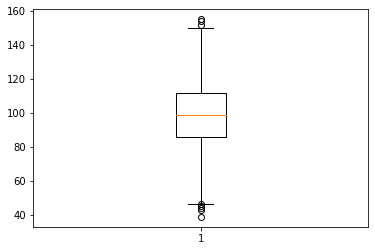

In [50]:
# 시각화로 표현
import matplotlib.pyplot as plt



**df.quantile(q=0.5, axis=0, numeric_only=True, interpolation='linear')**
- q : 분위수 입니다. 소수로 표현합니다. (예 : 75% = 0.75)
- aixs : 분위수의 값을 구할 축입니다.
- numeric_only : 수(소수)만 대상으로할지 여부입니다. False일 경우 datetime 및 timedelta 데이터의 분위수도 계산됩니다.
- interpolation : 분위수에 값이 없을때 보간하는 방법입니다. 방식은 아래와 같습니다.

    - liner : i + (j - i) x 비율 [분위수 앞, 뒤 수 간격 * 비율]
    - lower : i [분위수 앞, 뒤수 중 작은수]
    - higher : j [분위수 앞, 뒤수 중 큰수]
    - midpoint : (i+j)÷2 [분위수 앞, 뒤수의 중간값]
    - nearest : i or j [분위수 앞, 뒤수중 분위수에 가까운 수]

In [65]:
# 사분위수
scores
scores.sort()
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

- 분위수 위치는 0을 시작으로 하고 오사 오입 방식을 사용함
    - 오사오입(round-to-nearest-even) (파이썬의 특징)
        - 반올림에서 5 미만의 숫자는 내림, 5 초과의 숫자는 올림
        - 5의 앞자리가 홀수인 경우에는 올림을, 짝수인 경우에는 내림

In [51]:
# 오사오입 예제
 # 5의 앞자리가 0(짝수)이므로 내림
round(0.5)
 # 5의 앞자리가 1(홀수)이므로 올림
round(1.5)
 # 5의 앞자리가 2(짝수)이므로 내림
round(2.5)
 # 5의 앞자리가 7(홀수)이므로 올림
round(7.5)

0

2

2

8

In [84]:
scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [53]:
# 오사오입이 올림일 때는 값, 값-1
# 오사오입이 내림일 때는 값  값+1

# 올림 내림이 발생하지 않음
np.quantile(scores, q=0.00, method='linear')

41.000

In [54]:
# 오사오입이 내림일 때는 값  값+1
np.quantile(scores, q=0.25, method='linear')
# scores의 개수는 10개
# 위치 2.5 : 2와 3
# i + (j - i) x 비율 
48+(49-48)*0.25

48.250

48.250

In [96]:
# 오사오입이 올림일 때는 값, 값-1
# array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69]
np.quantile(scores, q=0.75, method='linear')
# 50%가 넘어가면 
# 위치 7.5 => 8
# 7과 8
58+(65-58)*0.75

48.250

63.250

In [55]:
np.quantile(scores, q=0.25, method='lower')
np.quantile(scores, q=0.25, method='higher')
np.quantile(scores, q=0.75, method='lower')
np.quantile(scores, q=0.75, method='higher')
        

48

49

58

65

In [56]:
np.quantile(scores, q=0.25, method='midpoint')
(48+49)/2
np.quantile(scores, q=0.75, method='midpoint')
(58+65)/2

48.500

48.500

61.500

61.500